In [1]:
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.3/123.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.1/145.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: numpy
    F

In [1]:
from google.colab import files

# Optional: You can skip this step if you are running the code on your own
# machine
uploaded = files.upload()

Saving admissions.csv to admissions.csv
Saving callout.csv to callout.csv
Saving chartevents.csv to chartevents.csv
Saving cptevents.csv to cptevents.csv
Saving icustays.csv to icustays.csv
Saving inputevents_mv.csv to inputevents_mv.csv
Saving labevents.csv to labevents.csv
Saving microbiologyevents.csv to microbiologyevents.csv
Saving outputevents.csv to outputevents.csv
Saving patients.csv to patients.csv
Saving prescriptions.csv to prescriptions.csv
Saving procedureevents_mv.csv to procedureevents_mv.csv
Saving procedures_icd.csv to procedures_icd.csv


In [2]:
import sdv
print(sdv.__version__)
import pandas as pd

1.2.1


In [3]:
from sdv.datasets.local import load_csvs
from sdv.datasets.demo import download_demo

# This is the default folder name that the GOogle Colab notebook uses.
# Change this if you have your own folder with CSV files.
FOLDER_NAME = 'content/'

try:
  datasets = load_csvs(folder_name='/content/')
except ValueError:
  print('You have not uploaded any csv files. Using some demo data instead.')
  datasets, _ = download_demo(
    modality='multi_table',
    dataset_name='fake_hotels'
  )

/usr/local/lib/python3.10/dist-packages/sdv/utils.py:180: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath, **pandas_kwargs)


In [4]:
datasets.keys()

dict_keys(['procedureevents_mv', 'procedures_icd', 'labevents', 'microbiologyevents', 'patients', 'cptevents', 'inputevents_mv', 'admissions', 'icustays', 'chartevents', 'callout', 'outputevents', 'prescriptions'])

In [5]:
admissions_df=datasets['admissions']
callout_df=datasets['callout']
chartevents_df=datasets['chartevents']
cptevents_df = datasets['cptevents']
icustays_df = datasets['icustays']
inputevents_mv_df = datasets['inputevents_mv']
labevents_df = datasets['labevents']
microbiologyevents_df = datasets['microbiologyevents']
outputevents_df = datasets['outputevents']
patients_df = datasets['patients']
prescriptions_df = datasets['prescriptions']
procedureevents_mv_df = datasets['procedureevents_mv']
procedures_icd_df = datasets['procedures_icd']

## Data preprocessing

In [6]:
def drop_row_id_column(data):
    if 'row_id' in data.columns:
        data.drop('row_id', axis=1, inplace=True)

In [7]:
drop_row_id_column(admissions_df)
drop_row_id_column(callout_df)
drop_row_id_column(chartevents_df)
drop_row_id_column(cptevents_df)
drop_row_id_column(icustays_df)
drop_row_id_column(inputevents_mv_df)
drop_row_id_column(labevents_df)
drop_row_id_column(microbiologyevents_df)
drop_row_id_column(outputevents_df)
drop_row_id_column(patients_df)
drop_row_id_column(prescriptions_df)
drop_row_id_column(procedureevents_mv_df)
drop_row_id_column(procedures_icd_df)

In [8]:
inputevents_mv_df.head()

,subject_id,hadm_id,icustay_id,starttime,endtime,itemid,amount,amountuom,rate,rateuom,...,totalamountuom,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_editedby,comments_canceledby,comments_date,originalamount,originalrate
0,87197,176931,209341.0,2109-11-16 12:10:00,2109-11-16 12:11:00,226452,400.0,ml,NaN,NaN,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,400.0,400.0
1,87197,176931,209341.0,2109-11-16 12:46:00,2109-11-16 12:47:00,226452,400.0,ml,NaN,NaN,...,ml,0,0,1,Rewritten,NaN,RN,2109-11-16 15:11:00,400.0,400.0
2,87197,176931,209341.0,2109-11-16 17:15:00,2109-11-16 17:16:00,226452,100.0,ml,NaN,NaN,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,100.0,100.0
3,87197,176931,209341.0,2109-11-16 13:00:00,2109-11-16 13:01:00,226452,200.0,ml,NaN,NaN,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,200.0,200.0
4,87197,176931,209341.0,2109-11-16 21:30:00,2109-11-16 21:31:00,226452,100.0,ml,NaN,NaN,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,100.0,100.0


In [9]:
procedures_icd_df.head()

,subject_id,hadm_id,seq_num,icd9_code
0,87197,176931,1,8191
1,1765,145878,1,9671
2,1765,145878,2,9604
3,1765,145878,3,640
4,1765,145878,4,9955


In [10]:
procedureevents_mv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   subject_id                  591 non-null    int64  
 1   hadm_id                     591 non-null    int64  
 2   icustay_id                  589 non-null    float64
 3   starttime                   591 non-null    object 
 4   endtime                     591 non-null    object 
 5   itemid                      591 non-null    int64  
 6   value                       591 non-null    float64
 7   valueuom                    591 non-null    object 
 8   location                    105 non-null    object 
 9   locationcategory            105 non-null    object 
 10  storetime                   591 non-null    object 
 11  cgid                        591 non-null    int64  
 12  orderid                     591 non-null    int64  
 13  linkorderid                 591 non

In [11]:
def changeObjectToDateTime(df,list):
    for i in list:
        df[i]=pd.to_datetime(df[i])

In [12]:
changeObjectToDateTime(admissions_df,['admittime','dischtime','deathtime','edregtime','edouttime'])
changeObjectToDateTime(callout_df,['createtime','updatetime','acknowledgetime','outcometime','firstreservationtime','currentreservationtime'])
changeObjectToDateTime(chartevents_df,['charttime','storetime'])
changeObjectToDateTime(icustays_df,['intime','outtime'])
changeObjectToDateTime(inputevents_mv_df,['starttime','endtime','storetime','comments_date'])
changeObjectToDateTime(labevents_df,['charttime'])
changeObjectToDateTime(microbiologyevents_df,['chartdate','charttime'])
changeObjectToDateTime(outputevents_df,['charttime','storetime'])
changeObjectToDateTime(patients_df,['dob','dod','dod_hosp','dod_ssn'])
changeObjectToDateTime(prescriptions_df,['startdate','enddate'])
changeObjectToDateTime(procedureevents_mv_df,['starttime','endtime','storetime','comments_date'])



In [13]:
labevents_df['value'].unique()

array(['NEG', '20', '49', ..., '8.10', '6.55', '1287'], dtype=object)

In [14]:
labevents_df.drop('value', axis=1, inplace=True)



In [ ]:
admissions_df.info()

# new_row = {
#     'subject_id': None,
#     'gender': None,
#     'dob': None,
#     # ... Add other columns with values as None (NaN)
#     'hadm_id': 0  # Set 'hadm_id' to 0
# }

# # Append the new row to the 'admissions' DataFrame
admissions = admissions.append(new_row, ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   subject_id            132 non-null    int64         
 1   hadm_id               132 non-null    int64         
 2   admittime             132 non-null    datetime64[ns]
 3   dischtime             132 non-null    datetime64[ns]
 4   deathtime             11 non-null     datetime64[ns]
 5   admission_type        132 non-null    object        
 6   admission_location    132 non-null    object        
 7   discharge_location    132 non-null    object        
 8   insurance             132 non-null    object        
 9   language              87 non-null     object        
 10  religion              131 non-null    object        
 11  marital_status        113 non-null    object        
 12  ethnicity             132 non-null    object        
 13  edregtime           

NameError: ignored

In [15]:
# microbiologyevents_df['icustay_id'].isnull().sum()
procedureevents_mv_df['icustay_id'].isnull().sum()
# procedureevents_mv_df

2

In [16]:
chartevents_df

chartevents_df = chartevents_df.dropna(subset=['icustay_id'])

inputevents_mv_df = inputevents_mv_df.dropna(subset=['icustay_id'])

labevents_df = labevents_df.dropna(subset = ['hadm_id'])

outputevents_df = outputevents_df.dropna(subset = ['icustay_id'])

prescriptions_df = prescriptions_df.dropna(subset = ['icustay_id'])

procedureevents_mv_df = procedureevents_mv_df.dropna(subset = ['icustay_id'])

## Admissions preprocessing

In [18]:
dob_df = patients_df.loc[:, ['subject_id', 'dob']]
admissions_df.drop(['diagnosis', 'hospital_expire_flag'], axis=1, inplace=True)
admissions_df = pd.merge(dob_df, admissions_df, how='inner', on='subject_id')


KeyError: ignored

In [19]:
admissions_df.isnull().sum()

subject_id                0
dob                       0
hadm_id                   0
admittime                 0
dischtime                 0
deathtime               121
admission_type            0
admission_location        0
discharge_location        0
insurance                 0
language                 45
religion                  1
marital_status           19
ethnicity                 0
edregtime                62
edouttime                62
has_chartevents_data      0
dtype: int64

In [20]:
admissions_df.dtypes

subject_id                       int64
dob                     datetime64[ns]
hadm_id                          int64
admittime               datetime64[ns]
dischtime               datetime64[ns]
deathtime               datetime64[ns]
admission_type                  object
admission_location              object
discharge_location              object
insurance                       object
language                        object
religion                        object
marital_status                  object
ethnicity                       object
edregtime               datetime64[ns]
edouttime               datetime64[ns]
has_chartevents_data             int64
dtype: object

In [21]:
admissions_df = admissions_df.drop(admissions_df.loc[(pd.isna(admissions_df['deathtime']) == False) & (admissions_df['dischtime'] != admissions_df['deathtime'])].index)


In [22]:
import datetime
import random

def adjust_age_over_90(df):
    '''
    This method is to adjust the invalid date in 'dob' (which is 18xx)
    Process: Use the admittime minus 90 - 100 years, to let the age of patients are between 90 to 100
    '''

    years_100 = datetime.timedelta(days = (365 * 100 + 100/4))
    random_days_10_years = datetime.timedelta(days = random.randint(0, 10)*365)

    if (df['dob'] - datetime.datetime(1970,1,1)).total_seconds() < 0:
        return (df['admittime'] - years_100 + random_days_10_years)
    else:
        return df['dob']

In [23]:
admissions_df['dob'] = admissions_df.apply(adjust_age_over_90, axis=1)


In [25]:
import numpy as np
admissions_df['deathtime'] = admissions_df['deathtime'].apply(lambda flag: 1 if pd.isna(flag) == False else np.NaN)


In [27]:
# calculate the time delta
def time_process(df, early_col_name, late_col_name, second_early_col_name=None):
    '''
    If first_early_col_name exist, then use late_col - first_early_col_name,
        else, use then use late_col - second_early_col_name, else set result as NaN
    The result is the time delta, save it as the late column
    '''
    # basic date exist
    if (pd.isna(df[early_col_name]) == False) & (pd.isna(df[late_col_name]) == False):
        return abs(df[late_col_name] - df[early_col_name]).total_seconds()
    # basic date is not exist, use the second basic date
    elif (pd.isna(second_early_col_name) == False) & (pd.isna(df[late_col_name]) == False):
        return abs(df[late_col_name] - df[second_early_col_name]).total_seconds()
    # current date is not exist
    else:
        return np.NaN

In [28]:
admissions_df['edouttime'] = admissions_df.apply(time_process, args=('edregtime', 'edouttime'), axis=1)
admissions_df['edregtime'] = admissions_df.apply(time_process, args=('admittime', 'edregtime'), axis=1)
admissions_df['dischtime'] = admissions_df.apply(time_process, args=('admittime', 'dischtime'), axis=1)
admissions_df['admittime'] = admissions_df.apply(time_process, args=('dob', 'admittime'), axis=1)

In [29]:
admissions_df.drop(['subject_id', 'hadm_id', 'dob'], axis=1, inplace=True)


In [ ]:
datasets['admissions']=admissions_df
datasets['callout']=callout_df
datasets['chartevents']=chartevents_df
datasets['cptevents']=cptevents_df
datasets['icustays']=icustays_df
datasets['inputevents_mv']=inputevents_mv_df
datasets['labevents']=labevents_df
datasets['microbiologyevents']=microbiologyevents_df
datasets['outputevents']=outputevents_df
datasets['patients']=patients_df
datasets['prescriptions']=prescriptions_df
datasets['procedureevents_mv']=procedureevents_mv_df
datasets['procedures_icd']=procedures_icd_df

## Metadata

In [ ]:
from sdv.metadata import MultiTableMetadata

metadata = MultiTableMetadata()

In [ ]:
metadata.detect_table_from_dataframe(
    table_name='admissions',
    data=admissions_df
)
metadata.detect_table_from_dataframe(
    table_name='callout',
    data=callout_df
)

metadata.detect_table_from_dataframe(
    table_name='chartevents',
    data=chartevents_df
)

metadata.detect_table_from_dataframe(
    table_name='icustays',
    data=icustays_df
)

metadata.detect_table_from_dataframe(
    table_name='cptevents',
    data=cptevents_df
)


metadata.detect_table_from_dataframe(
    table_name='inputevents_mv',
    data=inputevents_mv_df
)

metadata.detect_table_from_dataframe(
    table_name='labevents',
    data=labevents_df
)

metadata.detect_table_from_dataframe(
    table_name='microbiologyevents',
    data=microbiologyevents_df
)

metadata.detect_table_from_dataframe(
    table_name='outputevents',
    data=outputevents_df
)

metadata.detect_table_from_dataframe(
    table_name='patients',
    data=patients_df
)
metadata.detect_table_from_dataframe(
    table_name='prescriptions',
    data=prescriptions_df
)
metadata.detect_table_from_dataframe(
    table_name='procedureevents_mv',
    data=procedureevents_mv_df
)

metadata.detect_table_from_dataframe(
    table_name='procedures_icd',
    data=procedures_icd_df
)

In [ ]:
print('Auto detected data:\n')
metadata

Auto detected data:



{
    "tables": {
        "admissions": {
            "columns": {
                "subject_id": {
                    "sdtype": "numerical"
                },
                "hadm_id": {
                    "sdtype": "numerical"
                },
                "admittime": {
                    "sdtype": "datetime"
                },
                "dischtime": {
                    "sdtype": "datetime"
                },
                "deathtime": {
                    "sdtype": "datetime"
                },
                "admission_type": {
                    "sdtype": "categorical"
                },
                "admission_location": {
                    "sdtype": "categorical"
                },
                "discharge_location": {
                    "sdtype": "categorical"
                },
                "insurance": {
                    "sdtype": "categorical"
                },
                "language": {
                    "sdtype": "categorical"
    

In [ ]:
outputevents_df['iserror'].unique()

array([nan])

In [ ]:
metadata.update_column(
    table_name='procedures_icd',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='procedures_icd',
    column_name='hadm_id',
    sdtype='id'
)

In [ ]:
metadata.update_column(
    table_name='cptevents',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='cptevents',
    column_name='hadm_id',
    sdtype='id'
)

In [ ]:
metadata.update_column(
    table_name='procedureevents_mv',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='procedureevents_mv',
    column_name='hadm_id',
    sdtype='id'
)
metadata.update_column(
    table_name='procedureevents_mv',
    column_name='icustay_id',
    sdtype='id'
)



In [ ]:
metadata.update_column(
    table_name='prescriptions',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='prescriptions',
    column_name='hadm_id',
    sdtype='id'
)

metadata.update_column(
    table_name='prescriptions',
    column_name='icustay_id',
    sdtype='id'
)



In [ ]:
metadata.update_column(
    table_name='patients',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='patients',
    column_name='expire_flag',
    sdtype='categorical'
)

In [ ]:
metadata.update_column(
    table_name='outputevents',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='outputevents',
    column_name='hadm_id',
    sdtype='id'
)

metadata.update_column(
    table_name='outputevents',
    column_name='icustay_id',
    sdtype='id'
)

metadata.update_column(
    table_name='outputevents',
    column_name='itemid',
    sdtype='id'
)

metadata.update_column(
    table_name='outputevents',
    column_name='cgid',
    sdtype='id'
)


In [ ]:
metadata.update_column(
    table_name='microbiologyevents',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='microbiologyevents',
    column_name='hadm_id',
    sdtype='id'
)

metadata.update_column(
    table_name='microbiologyevents',
    column_name='subject_id',
    sdtype='id'
)


In [ ]:
metadata.update_column(
    table_name='labevents',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='labevents',
    column_name='hadm_id',
    sdtype='id'
)

metadata.update_column(
    table_name='labevents',
    column_name='itemid',
    sdtype='id'
)

In [ ]:
metadata.update_column(
    table_name='inputevents_mv',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='inputevents_mv',
    column_name='hadm_id',
    sdtype='id'
)

metadata.update_column(
    table_name='inputevents_mv',
    column_name='icustay_id',
    sdtype='id'
)

metadata.update_column(
    table_name='inputevents_mv',
    column_name='itemid',
    sdtype='id'
)

metadata.update_column(
    table_name='inputevents_mv',
    column_name='cgid',
    sdtype='id'
)

metadata.update_column(
    table_name='inputevents_mv',
    column_name='orderid',
    sdtype='id'
)

metadata.update_column(
    table_name='inputevents_mv',
    column_name='linkorderid',
    sdtype='id'
)

metadata.update_column(
    table_name='inputevents_mv',
    column_name='isopenbag',
    sdtype='categorical'
)

metadata.update_column(
    table_name='inputevents_mv',
    column_name='continueinnextdept',
    sdtype='categorical'
)

metadata.update_column(
    table_name='inputevents_mv',
    column_name='cancelreason',
    sdtype='categorical'
)

metadata.update_column(
    table_name='inputevents_mv',
    column_name='cancelreason',
    sdtype='categorical'
)


In [ ]:
metadata.update_column(
    table_name='icustays',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='icustays',
    column_name='hadm_id',
    sdtype='id'
)

metadata.update_column(
    table_name='icustays',
    column_name='icustay_id',
    sdtype='id'
)

metadata.update_column(
    table_name='icustays',
    column_name='first_wardid',
    sdtype='categorical'
)

metadata.update_column(
    table_name='icustays',
    column_name='last_wardid',
    sdtype='categorical'
)

In [ ]:
metadata.update_column(
    table_name='chartevents',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='chartevents',
    column_name='hadm_id',
    sdtype='id'
)

metadata.update_column(
    table_name='chartevents',
    column_name='icustay_id',
    sdtype='id'
)

metadata.update_column(
    table_name='chartevents',
    column_name='itemid',
    sdtype='id'
)

metadata.update_column(
    table_name='chartevents',
    column_name='cgid',
    sdtype='id'
)

metadata.update_column(
    table_name='chartevents',
    column_name='itemid',
    sdtype='id'
)

metadata.update_column(
    table_name='chartevents',
    column_name='warning',
    sdtype='categorical'
)

metadata.update_column(
    table_name='chartevents',
    column_name='error',
    sdtype='categorical'
)

In [ ]:
metadata.update_column(
    table_name='admissions',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='admissions',
    column_name='hadm_id',
    sdtype='id'
)

metadata.update_column(
    table_name='admissions',
    column_name='hospital_expire_flag',
    sdtype='categorical'
)


metadata.update_column(
    table_name='admissions',
    column_name='has_chartevents_data',
    sdtype='categorical'
)

In [ ]:
metadata.update_column(
    table_name='callout',
    column_name='subject_id',
    sdtype='id'
)

metadata.update_column(
    table_name='callout',
    column_name='hadm_id',
    sdtype='id'
)

metadata.update_column(
    table_name='callout',
    column_name='hadm_id',
    sdtype='id'
)

metadata.update_column(
    table_name='callout',
    column_name='submit_wardid',
    sdtype='categorical'
)

metadata.update_column(
    table_name='callout',
    column_name='callout_wardid',
    sdtype='categorical'
)

metadata.update_column(
    table_name='callout',
    column_name='curr_wardid',
    sdtype='categorical'
)

metadata.update_column(
    table_name='callout',
    column_name='request_tele',
    sdtype='categorical'
)

metadata.update_column(
    table_name='callout',
    column_name='request_resp',
    sdtype='categorical'
)

metadata.update_column(
    table_name='callout',
    column_name='request_cdiff',
    sdtype='categorical'
)

metadata.update_column(
    table_name='callout',
    column_name='request_mrsa',
    sdtype='categorical'
)

metadata.update_column(
    table_name='callout',
    column_name='request_vre',
    sdtype='categorical'
)

metadata.update_column(
    table_name='callout',
    column_name='discharge_wardid',
    sdtype='categorical'
)


In [ ]:
# admissions_df=datasets['admissions']
# callout_df=datasets['callout']
# chartevents_df=datasets['chartevents']
# cptevents_df = datasets['cptevents']
# icustays_df = datasets['icustays']
# inputevents_mv_df = datasets['inputevents_mv']
# labevents_df = datasets['labevents']
# microbiologyevents_df = datasets['microbiologyevents']
# outputevents_df = datasets['outputevents']
# patients_df = datasets['patients']
# prescriptions_df = datasets['prescriptions']
# procedureevents_mv_df = datasets['procedureevents_mv']
# procedures_icd_df = datasets['procedures_icd']

metadata.set_primary_key(
    table_name='patients',
    column_name='subject_id'
)

metadata.set_primary_key(
    table_name='admissions',
    column_name='hadm_id'
)

# metadata.add_alternate_keys(
#     table_name='cptevents',
#     column_names=['cpt_cd']
# )

metadata.set_primary_key(
    table_name='icustays',
    column_name='icustay_id'
)



In [ ]:
metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='admissions',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='callout',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

# metadata.add_relationship(
#     parent_table_name='admissions',
#     child_table_name='callout',
#     parent_primary_key='hadm_id',
#     child_foreign_key='hadm_id',
# )


# metadata.add_relationship(
#     parent_table_name='admissions',
#     child_table_name='chartevents',
#     parent_primary_key='hadm_id',
#     child_foreign_key='hadm_id',
# )


metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='chartevents',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

# metadata.add_relationship(
#     parent_table_name='icustays',
#     child_table_name='chartevents',
#     parent_primary_key='icustay_id',
#     child_foreign_key='icustay_id',
# )

# metadata.add_relationship(
#     parent_table_name='admissions',
#     child_table_name='cptevents',
#     parent_primary_key='hadm_id',
#     child_foreign_key='hadm_id',
# )

metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='cptevents',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='icustays',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

# metadata.add_relationship(
#     parent_table_name='admissions',
#     child_table_name='icustays',
#     parent_primary_key='hadm_id',
#     child_foreign_key='hadm_id',
# )

# metadata.add_relationship(
#     parent_table_name='admissions',
#     child_table_name='inputevents_mv',
#     parent_primary_key='hadm_id',
#     child_foreign_key='hadm_id',
# )

metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='inputevents_mv',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

# metadata.add_relationship(
#     parent_table_name='icustays',
#     child_table_name='inputevents_mv',
#     parent_primary_key='icustay_id',
#     child_foreign_key='icustay_id',
# )

metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='labevents',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

# metadata.add_relationship(
#     parent_table_name='admissions',
#     child_table_name='labevents',
#     parent_primary_key='hadm_id',
#     child_foreign_key='hadm_id',
# )

metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='microbiologyevents',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

# metadata.add_relationship(
#     parent_table_name='admissions',
#     child_table_name='microbiologyevents',
#     parent_primary_key='hadm_id',
#     child_foreign_key='hadm_id',
# )

metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='outputevents',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

# metadata.add_relationship(
#     parent_table_name='admissions',
#     child_table_name='outputevents',
#     parent_primary_key='hadm_id',
#     child_foreign_key='hadm_id',
# )

# metadata.add_relationship(
#     parent_table_name='icustays',
#     child_table_name='outputevents',
#     parent_primary_key='icustay_id',
#     child_foreign_key='icustay_id',
# )

metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='prescriptions',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

# metadata.add_relationship(
#     parent_table_name='admissions',
#     child_table_name='prescriptions',
#     parent_primary_key='hadm_id',
#     child_foreign_key='hadm_id',
# )

# metadata.add_relationship(
#     parent_table_name='icustays',
#     child_table_name='prescriptions',
#     parent_primary_key='icustay_id',
#     child_foreign_key='icustay_id',
# )

metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='procedureevents_mv',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

# metadata.add_relationship(
#     parent_table_name='admissions',
#     child_table_name='procedureevents_mv',
#     parent_primary_key='hadm_id',
#     child_foreign_key='hadm_id',
# )

# metadata.add_relationship(
#     parent_table_name='icustays',
#     child_table_name='procedureevents_mv',
#     parent_primary_key='icustay_id',
#     child_foreign_key='icustay_id',
# )

metadata.add_relationship(
    parent_table_name='patients',
    child_table_name='procedures_icd',
    parent_primary_key='subject_id',
    child_foreign_key='subject_id'
)

# metadata.add_relationship(
#     parent_table_name='admissions',
#     child_table_name='procedures_icd',
#     parent_primary_key='hadm_id',
#     child_foreign_key='hadm_id',
# )

In [ ]:
metadata.validate()

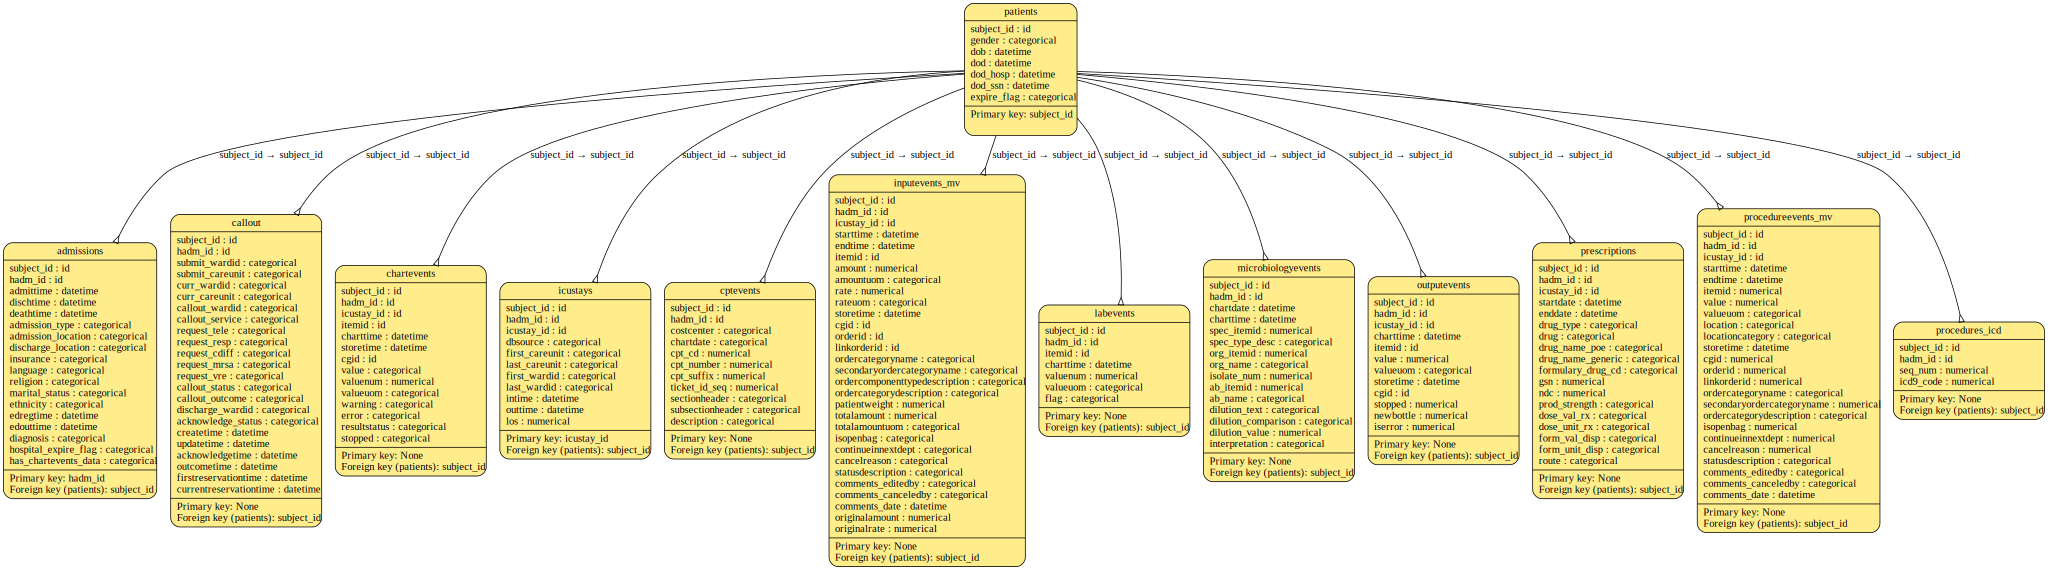

In [ ]:
metadata.visualize()

## metadata.save_to_json('metadata.json')

metadata = MultiTableMetadata.load_from_json('metadata.json')

In [ ]:
# admissions_df=datasets['admissions']
# callout_df=datasets['callout']
# chartevents_df=datasets['chartevents']
# cptevents_df = datasets['cptevents']
# icustays_df = datasets['icustays']
# inputevents_mv_df = datasets['inputevents_mv']
# labevents_df = datasets['labevents']
# microbiologyevents_df = datasets['microbiologyevents']
# outputevents_df = datasets['outputevents']
# patients_df = datasets['patients']
# prescriptions_df = datasets['prescriptions']
# procedureevents_mv_df = datasets['procedureevents_mv']
# procedures_icd_df = datasets['procedures_icd']

cptevents_df['hadm_id'].isnull().sum()


0

## Training models


In [ ]:
from sdv.multi_table import HMASynthesizer

synthesizer = HMASynthesizer(metadata)
synthesizer.validate(datasets)

In [ ]:
synthesizer.fit(datasets)
synthetic_data = synthesizer.sample(scale=1)

Preprocess Tables:  62%|██████▏   | 8/13 [00:01<00:01,  4.29it/s]/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'valuenum'. Data will not be rounded.
  warnings.warn(
Preprocess Tables: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]



Learning relationships:


(1/12) Tables 'patients' and 'procedureevents_mv' ('subject_id'):  13%|█▎        | 6/45 [00:06<00:42,  1.08s/it]/usr/local/lib/python3.10/dist-packages/copulas/multivariate/gaussian.py:119: UserWarning: Unable to fit to a <class 'copulas.univariate.beta.BetaUnivariate'> distribution for column comments_canceledby. Using a Gaussian distribution instead.
  warnings.warn(warning_message)
(1/12) Tables 'patients' and 'procedureevents_mv' ('subject_id'):  16%|█▌        | 7/45 [00:07<00:43,  1.14s/it]/usr/local/lib/python3.10/dist-packages/copulas/multivariate/gaussian.py:119: UserWarning: Unable to fit to a <class 'copulas.univariate.beta.BetaUnivariate'> distribution for column location. Using a Gaussian distribution instead.
  warnings.warn(warning_message)
(1/12) Tables 'patients' and 'procedureevents_mv' ('subject_id'):  27%|██▋       | 12/45 [00:15<00:44,  1.35s/it]/usr/local/lib/python3.10/dist-packages/copulas/multivariate/gaussian.py:119: UserWarning: Unable to fit to a <class 'copu

Modeling Tables: 100%|██████████| 1/1 [02:24<00:00, 144.68s/it]
/usr/local/lib/python3.10/dist-packages/sdv/data_processing/numerical_formatter.py:108: DeprecationWarning: Passing `np.nan` to mean no clipping in np.clip has always been unreliable, and is now deprecated. In future, this will always return nan, like it already does when min or max are arrays that contain nan. To skip a bound, pass either None or an np.inf of an appropriate sign.
  column = column.clip(self._min_value, self._max_value)
/usr/local/lib/python3.10/dist-packages/sdv/data_processing/numerical_formatter.py:108: DeprecationWarning: Passing `np.nan` to mean no clipping in np.clip has always been unreliable, and is now deprecated. In future, this will always return nan, like it already does when min or max are arrays that contain nan. To skip a bound, pass either None or an np.inf of an appropriate sign.
  column = column.clip(self._min_value, self._max_value)
/usr/local/lib/python3.10/dist-packages/sdv/data_proce

ValueError: ignored